In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
aqi = pd.read_csv("AQI.csv")
aqi.head(100)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
...,...,...,...,...,...,...,...,...
95,96,2016-01-05,Lawrenceville 2,SO2,27,Good,NaN,NaN
96,97,2016-01-05,South Fayette,SO2,11,Good,NaN,NaN
97,98,2016-01-05,Parkway East,CO,7,Good,NaN,NaN
98,99,2016-01-05,Glassport High Street,PM10,9,Good,NaN,NaN


In [4]:
dictnum = dict()
changed = False
for i in aqi.index:
    
    for x in dictnum:
        if x == aqi['site'][i]:
            dictnum.update({aqi['site'][i] : dictnum[x] + 1})
            changed = True
            break
    
    if changed == False:
        dictnum.update({aqi['site'][i] : 1})
    changed = False
    
for x, y in dictnum.items():
    print(x, y)

Lawrenceville 4398
Flag Plaza 4002
Harrison Township 5550
Avalon 4424
Lincoln 3574
South Fayette 4999
North Braddock 7237
Parkway East 8572
Liberty 2 5636
Lawrenceville 2 5714
Glassport High Street 2857
Liberty 2878
Clairton 925
West Mifflin 301
Pittsburgh 2605


In [5]:
dictAvg = dict()
added = False
for i in aqi.index:
    for x in dictAvg:
        if x == aqi['site'][i]:
            dictAvg.update({aqi['site'][i] : dictAvg[x] + aqi['index_value'][i]})
            added = True
            break
    
    if added == False:
        dictAvg.update({aqi['site'][i] : aqi['index_value'][i]})
    added = False

for x in dictAvg:
    dictAvg.update({x : dictAvg[x]/dictnum[x]})

for x, y in dictAvg.items():
    print(x, y)

Lawrenceville 37.7019099590723
Flag Plaza 9.94927536231884
Harrison Township 24.28900900900901
Avalon 23.486663652802893
Lincoln 35.10800223838836
South Fayette 22.701740348069613
North Braddock 18.779604808622356
Parkway East 21.904806346243582
Liberty 2 32.46132008516678
Lawrenceville 2 3.0582779138956946
Glassport High Street 17.453622681134057
Liberty 18.506254343293953
Clairton 25.835675675675677
West Mifflin 6.335548172757475
Pittsburgh 26.131669865642994


These are the averages of all of the 65,000 sets of data taken by different sesors in different neighborhoods we can see that West Mifflin and Flag Plaza have the lowest average AQI out of all of the different neighborhoods

In [6]:
lawrenceAvg = (37.7019099590723 + 3.0582779138956946)/2
libertyAvg = (32.46132008516678 + 18.506254343293953)/2
print("Lawrenceville", lawrenceAvg)
print("Liberty", libertyAvg)

Lawrenceville 20.380093936484
Liberty 25.483787214230368


These are the offical averages of Lawrenceville and Liberty sice they both had 2 different sesors on them.

West Mifflin has the healthiest AQI average at 6.335548172757475 followed by Flag plaza at 9.94927536231884, than Glassport High Street at 17.453622681134057

1. West Mifflin 6.335548172757475
2. Flag Plaza 9.94927536231884
3. Glassport High Street 17.453622681134057
4. North Braddock 18.779604808622356
5. Lawrenceville 20.380093936484
6. Parkway East 21.904806346243582
7. South Fayette 22.701740348069613
8. Avalon 23.486663652802893
9. Harrison Township 24.28900900900901
10. Liberty 25.483787214230368
11. Clairton 25.835675675675677
12. Pittsburgh 26.131669865642994
13. Lincoln 35.10800223838836

Neighborhoods ranked from most healthy to least healthy average AQI

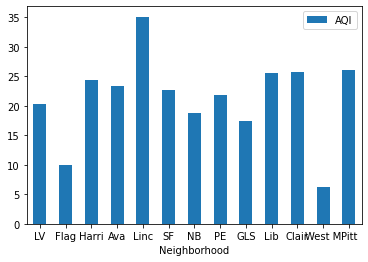

In [11]:
df = pd.DataFrame({'Neighborhood':['LV', 'Flag', 'Harri', 'Ava', 'Linc', 'SF', 'NB', 'PE', 'GLS', 'Lib', 'Clair', 'West M', 'Pitt'], 'AQI':[20.3, 9.9, 24.3, 23.4, 35.1, 22.7, 18.8, 21.9, 17.5, 25.5, 25.8, 6.3, 26.1]})
ax = df.plot.bar(x='Neighborhood', y='AQI', rot=0)